In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Exercise 1

## Q1
Load the file Im1.jpg in Im1. Display the image and describe the problem with
this image.

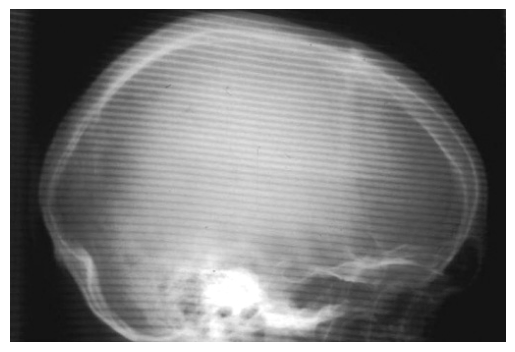

In [3]:
img = cv2.imread('Im1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [4]:
print(f"the shape of the image is: {img.shape}")
print(f"the range of the image is: {img.min()} to {img.max()}")
print("the type of the image is: ", img.dtype)


the shape of the image is: (339, 505)
the range of the image is: 16 to 255
the type of the image is:  uint8


In [5]:
img = img/255
print(f"the range of the image is: {img.min()} to {img.max()}")
print("the type of the image is: ", img.dtype)

the range of the image is: 0.06274509803921569 to 1.0
the type of the image is:  float64


Problems with the image:
- we can see the image has some horizontal noise. 
- there is shallow white area in the left side of the image.
- we can see the dark pixels in the image are not zero.

# Q2
Use a mean filter of size 3×3 and 5×5 to denoise. Display and comment the results.

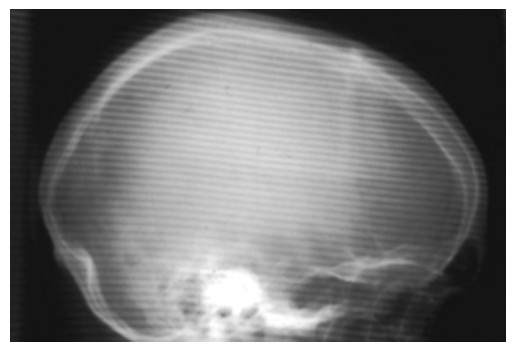

In [6]:
img_mean_3 = cv2.blur(img,(3,3))
plt.imshow(img_mean_3, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

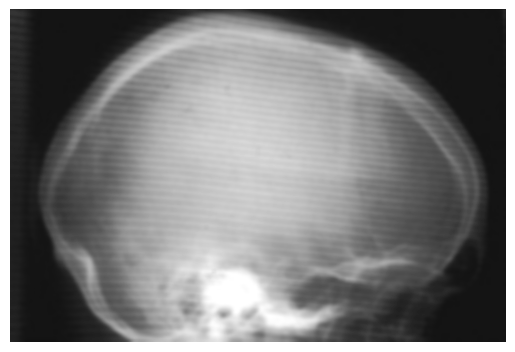

In [7]:
img_mean_5 = cv2.blur(img,(5,5))
plt.imshow(img_mean_5, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()


we can see the lines are disappeared a bit.
obviously, in 3x3 filter, the lines are more clear than 5x5 filter.

# Q3
Compute and display the amplitude of the Fourier Transform of Im1.


the shape of the image is:  (339, 505)


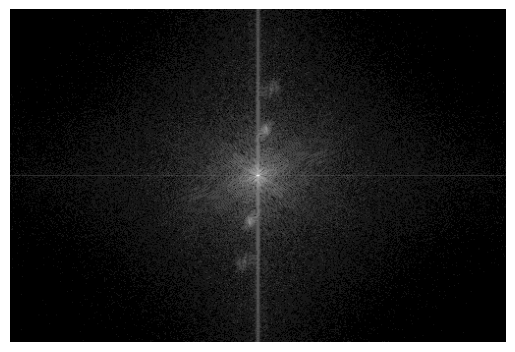

In [8]:
img_fft_raw = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft_raw)
img_fft_amp = np.log1p(np.abs(img_fft))
print("the shape of the image is: ", img_fft_amp.shape)
plt.imshow(img_fft_amp.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.show()

# Q4
Detect in the amplitude of the spectrum the noise patterns which might be due to
the Moiré effect. Write the commands to detect/display these zones of the matrix.
(Inspect the position by hand in the matrix/image, then check in the matrix of the
amplitude, there should be be 4 “anomalies”).

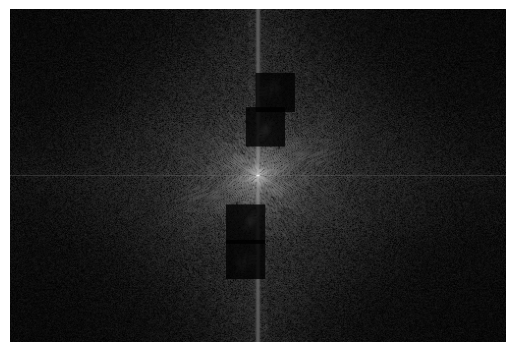

In [27]:
rec_locs = [(120, 260), (85, 270), (219, 240), (255, 240)]
rec_daimeter = [20, 20, 20, 20]

img_fft_raw = np.fft.fft2(img)
img_fft = np.fft.fftshift(img_fft_raw)
img_fft_amp = np.log1p(np.abs(img_fft))
for (x,y), d in zip(rec_locs, rec_daimeter):
    img_fft_amp[x-d:x+d, y-d:y+d] *= 0.2

plt.imshow(img_fft_amp, cmap='gray')
plt.axis('off')
plt.show()

# Q5
Propose a filter $h$, which will be defined in the frequency domain and which should
allow to discard the problematic frequencies. Construct $\mathcal{F}(h)$ and display $|\mathcal{F}(h)|$.

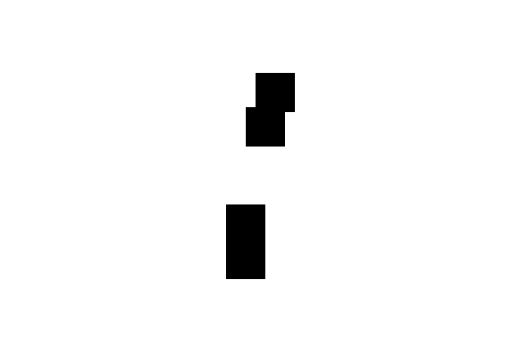

In [28]:
h = np.ones_like(img)
for (x,y), d in zip(rec_locs, rec_daimeter):
    h[x-d:x+d, y-d:y+d] = 0

plt.imshow(h, cmap='gray')
plt.axis('off')
plt.show()

## 3D view of the filter


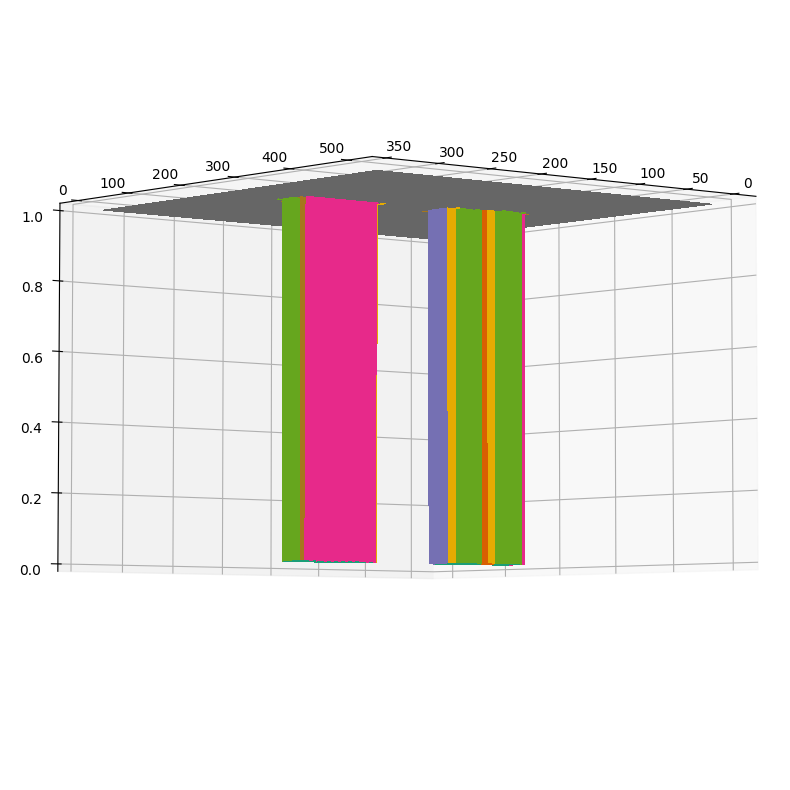

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(h.shape[0]), np.arange(h.shape[1]))

surf = ax.plot_surface(X, Y, h.T, cmap="Dark2",
                       linewidth=0, antialiased=False)

ax.view_init(-4, 50)
plt.show()

# 6
Compute F(h ∗ Im1) and display jF(h ∗ Im1)j.

we know:
$$
\mathcal{F}(h \ast Im1) = \mathcal{F}(h) \cdot \mathcal{F}(Im1)
$$

in my codes, $\mathcal{F}(h)$ is defined as $h$.

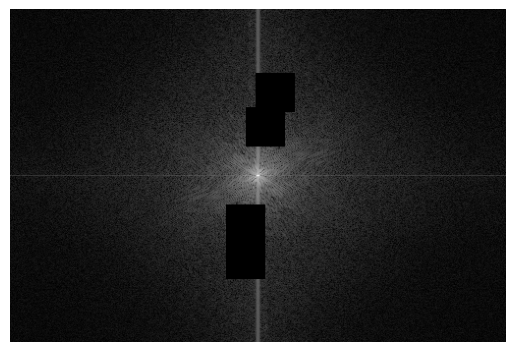

In [30]:
filtered = img_fft * h
filtered_amp = np.log1p(np.abs(filtered))
plt.imshow(filtered_amp, cmap='gray')
plt.axis('off')
plt.show()

# 7
Compute and display h ∗ Im1.


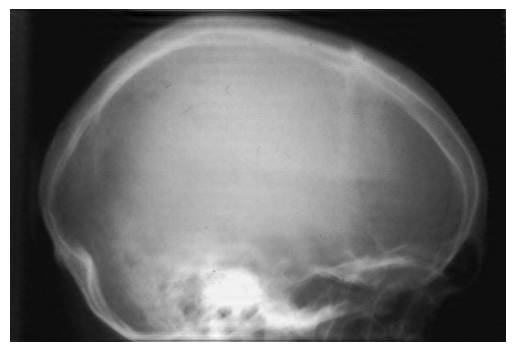

In [31]:
filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered))
filtered_img = np.abs(filtered_img)
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')
plt.show()

> - TODO: study the impact of the rectangle size on the result.
> - TODO: check what will happen if we use circle instead of rectangle.


# Exercise 2

## Q1

Load the file signal_hw.bin in f. Display the signal f. What is its length N?

to do so i have used the following code in octave:

```octave
load -binary  signal_hw.bin f
csvwrite('signal_hw.txt', f)
```

In [81]:
with open("signal_hw.txt") as f:
    data = np.array(f.read().strip().split(",")).astype(np.float32)
    # since the data only contains only one row, there is no need to read line by line
data.shape

(800,)

as we can see the size of the signal is 800.